The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


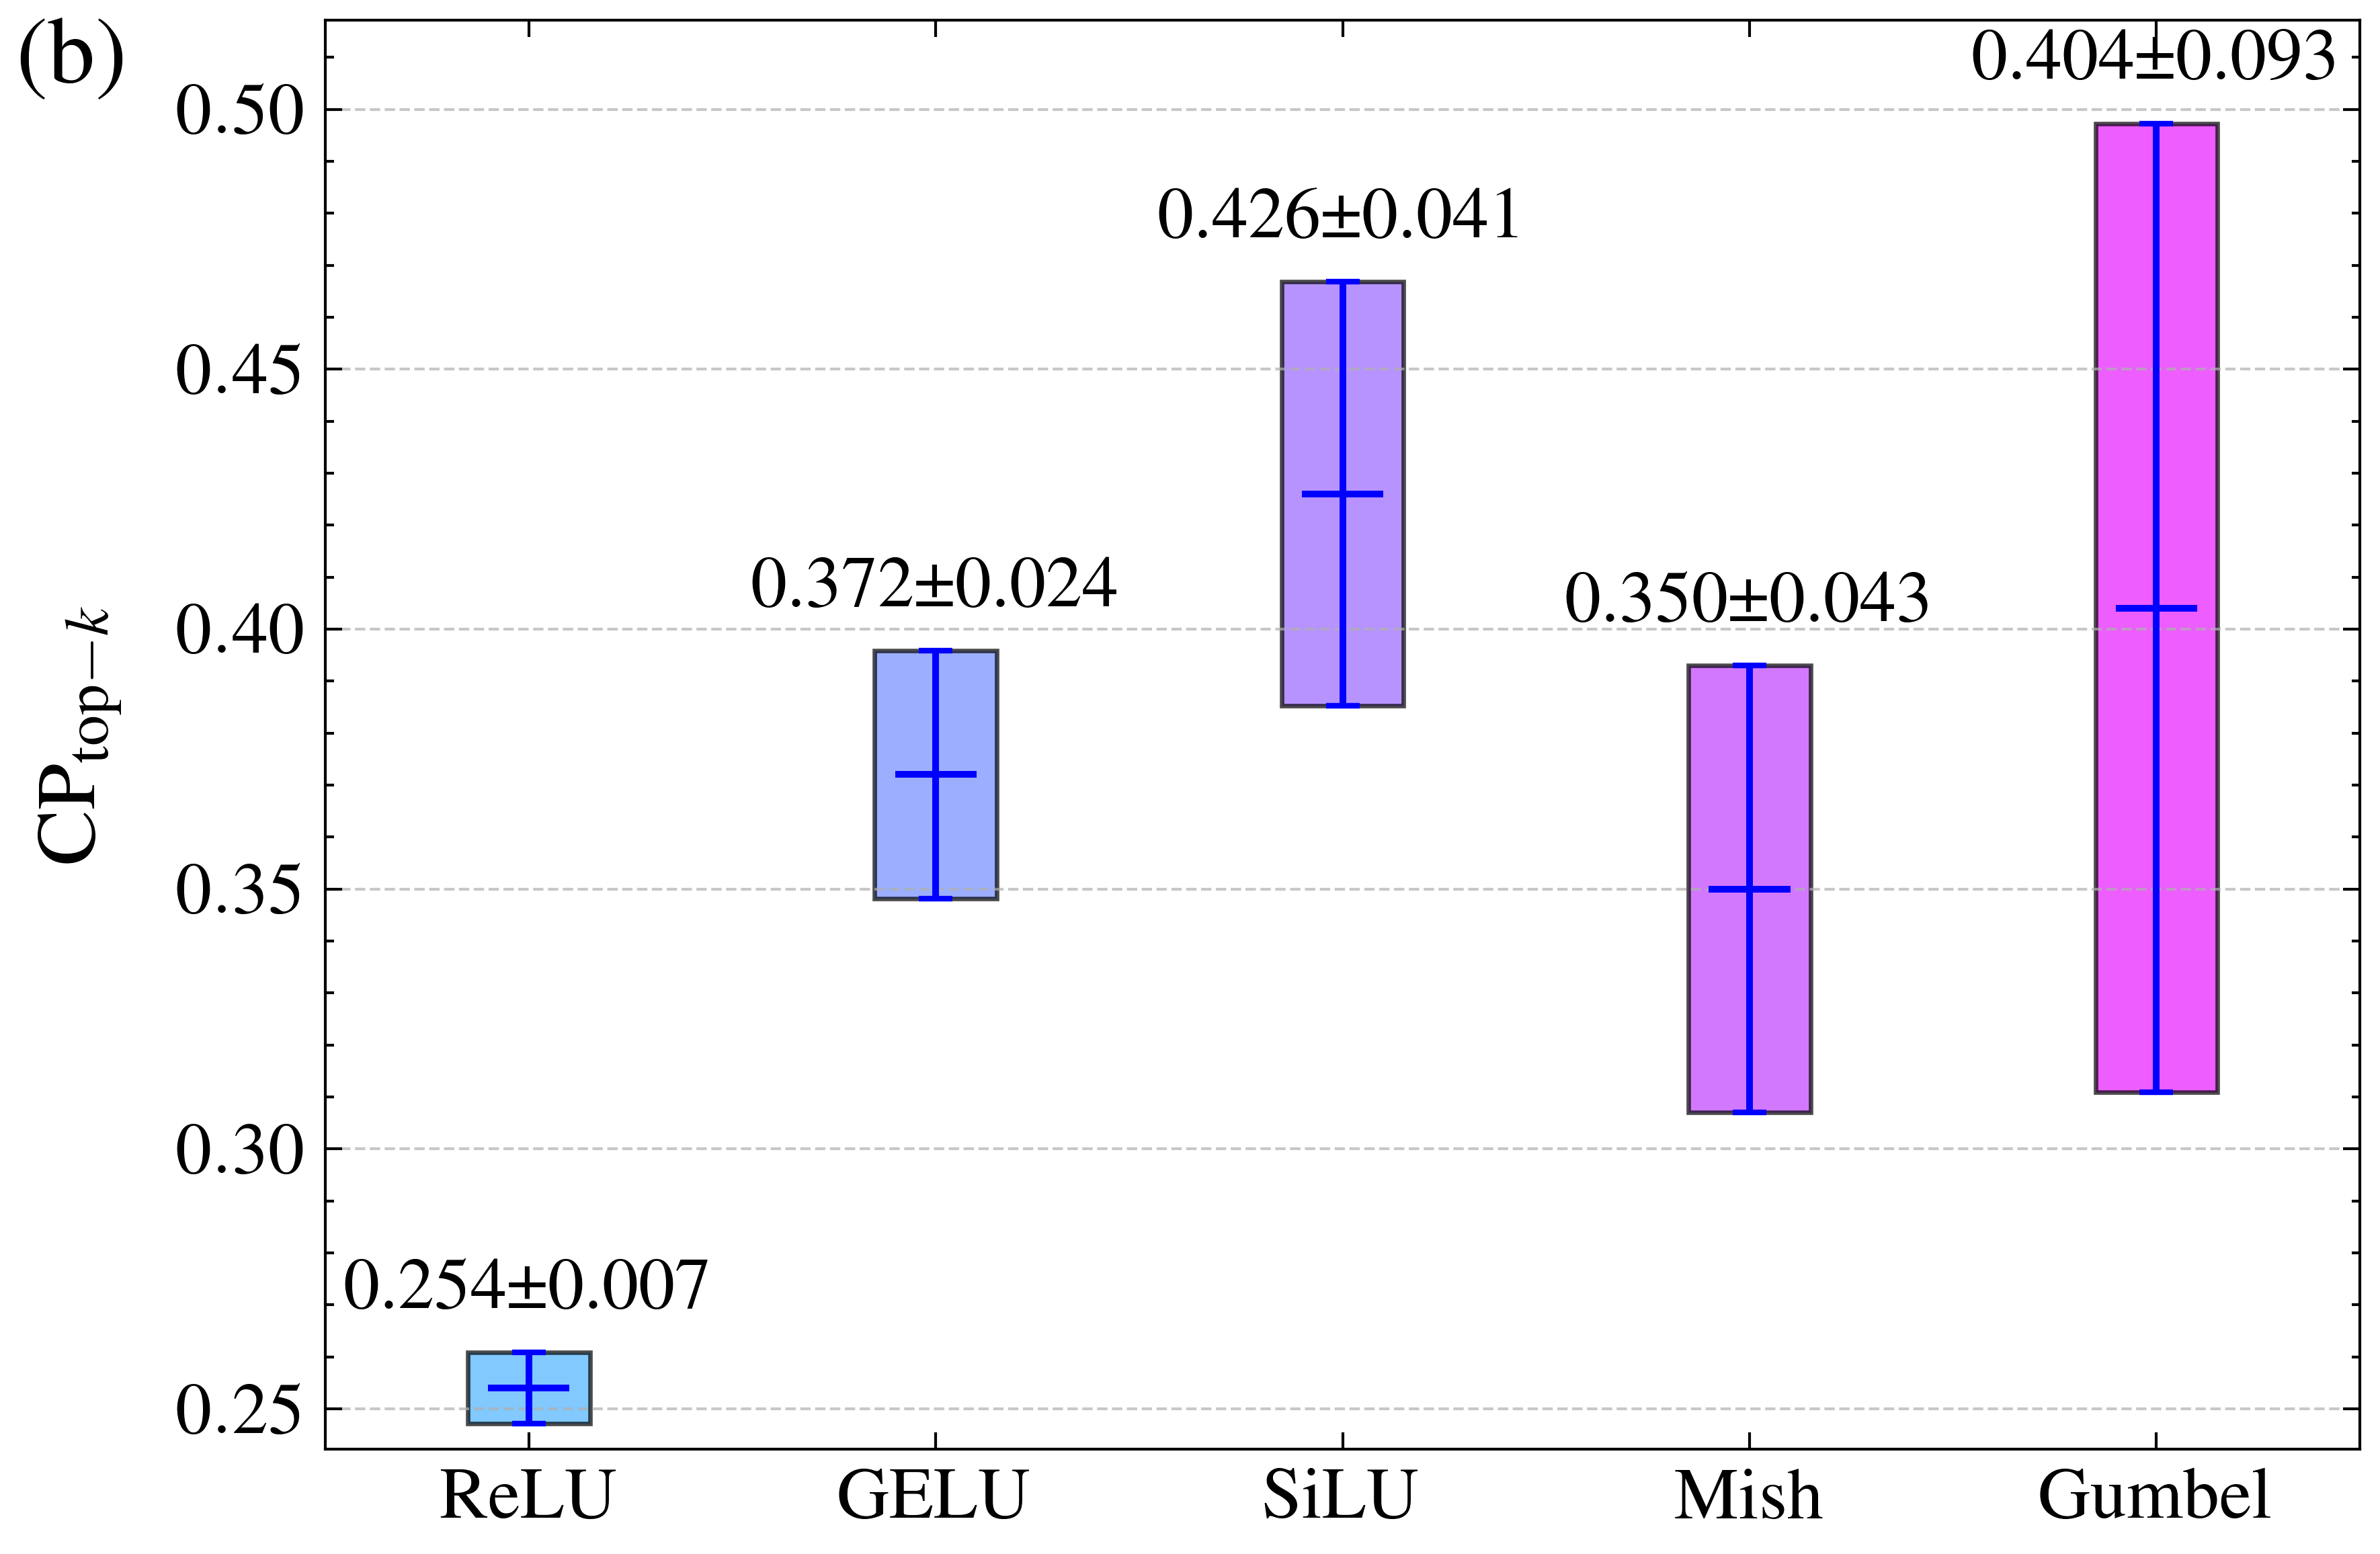

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.25,0.26,0.25,0.26,0.25],
    [0.38,0.39,0.38,0.34,0.37],
    [0.47,0.42,0.38,0.44,0.42],
    [0.34,0.34,0.32,0.41,0.34],
    [0.36,0.34,0.38,0.53,0.41]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.cool(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.02
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig7b.eps', format='eps', dpi=800)

# 显示图像
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


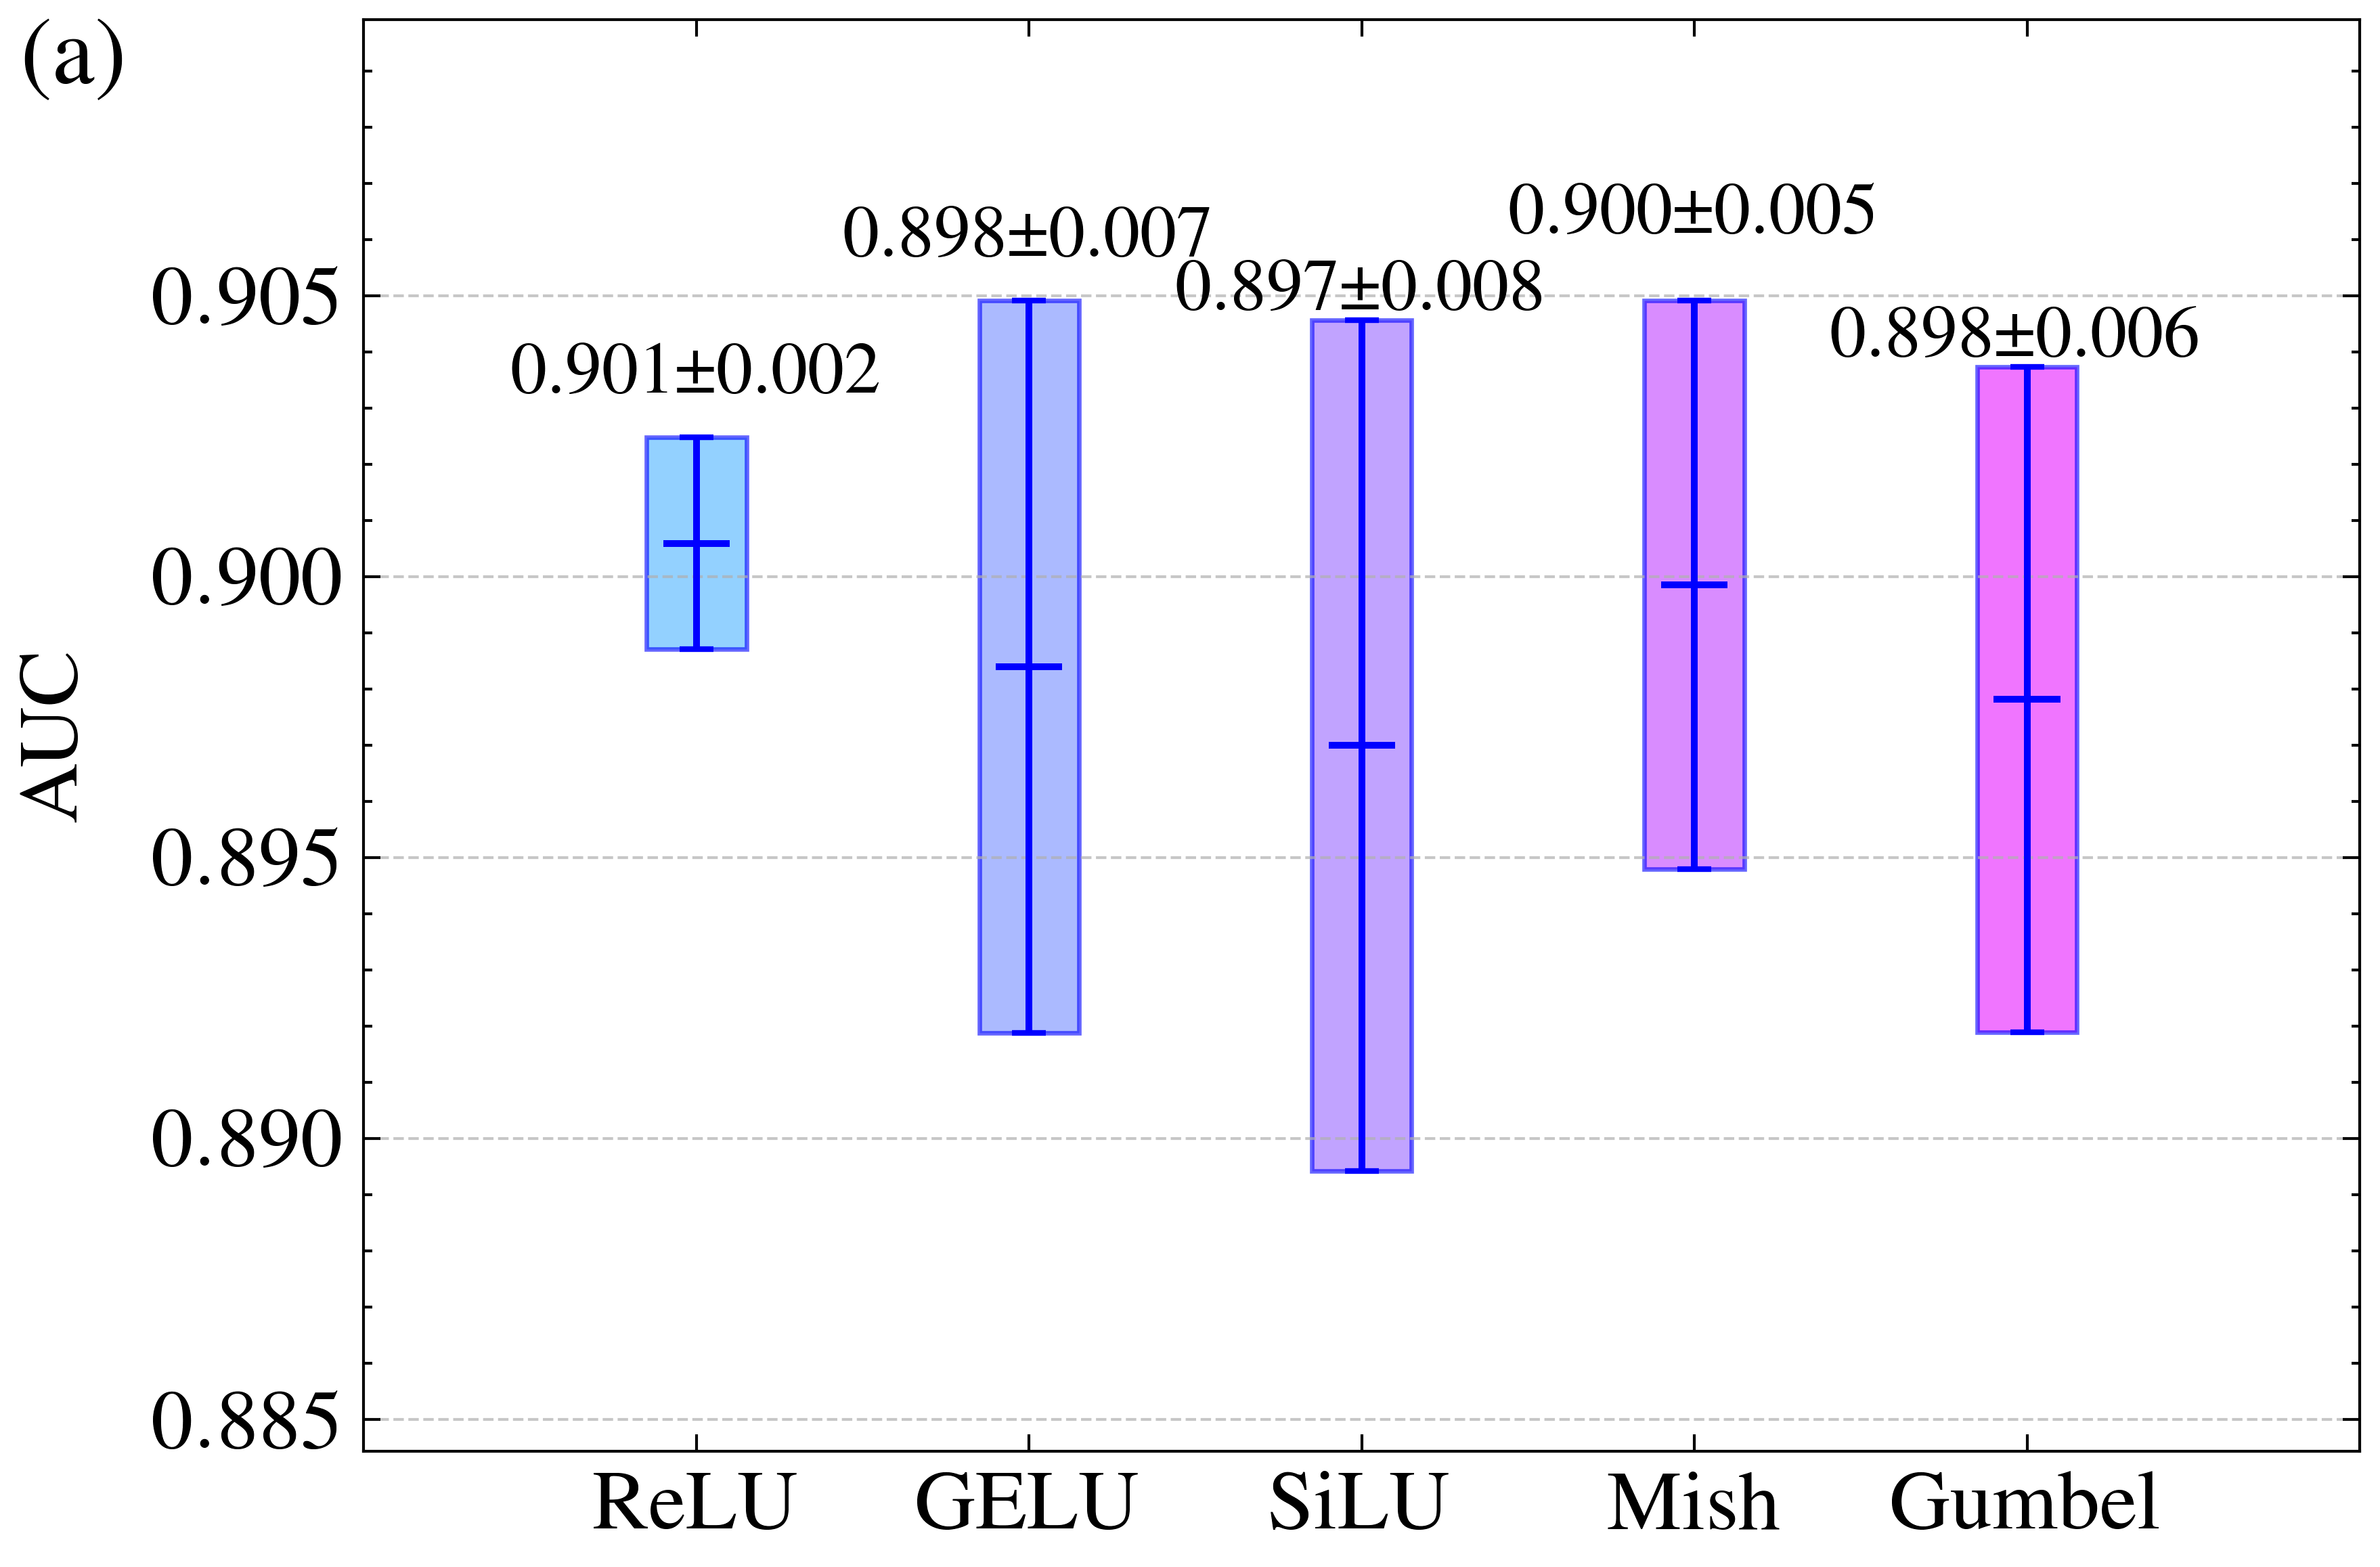

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.899,0.900,0.900,0.903,0.901],  # ReLU
    [0.8988,0.8896,0.9029,0.9019,0.8988],  # GELU
    [0.9019,0.8978,0.8866,0.90089,0.8978],  # SiLU
    [0.90089,0.8988,0.90089,0.89376,0.90496],  # Mish
    [0.8907,0.90089,0.8958,0.9029,0.8988]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.cool(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 9
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = -1 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Mish
        y_offset = -1
        x_offset = 0 # 调整 Mish 的水平偏移

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.005
ax.set_ylim(y_min, y_max)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.17, 1.0, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig7a.eps', format='eps', dpi=800)

# 显示图形
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


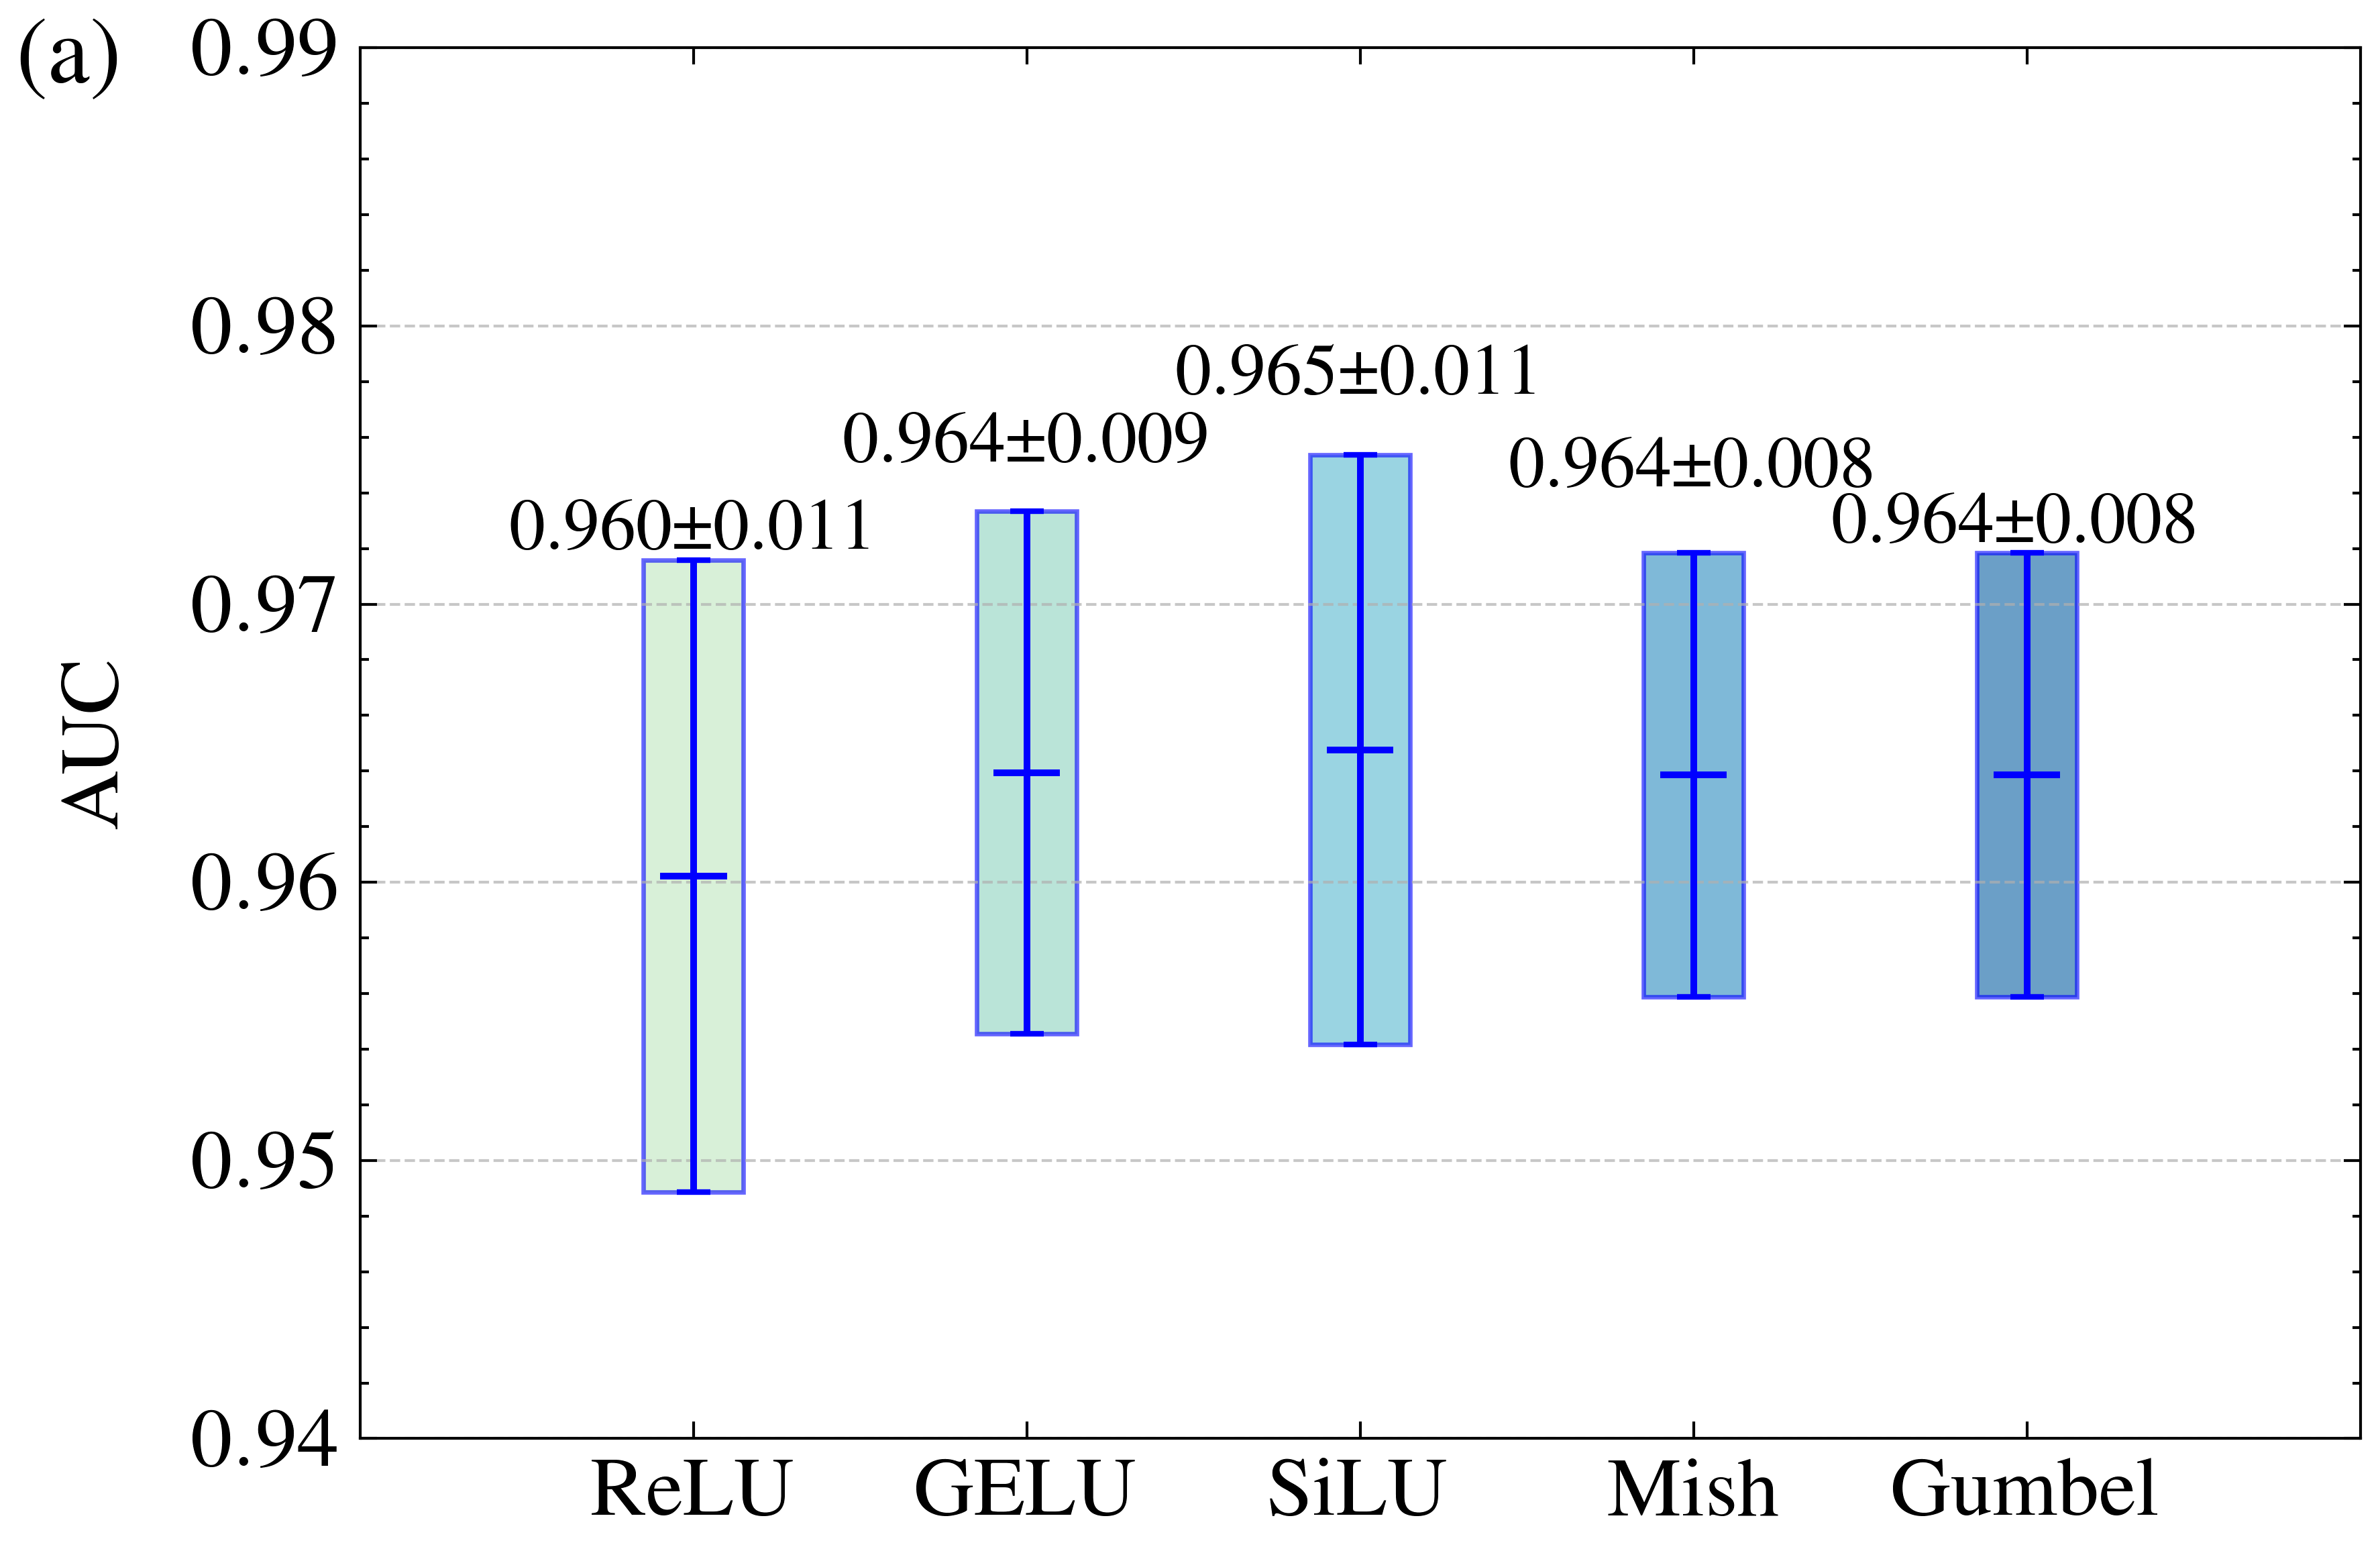

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.9527,0.9605,0.9635,0.9736,0.9508],  # ReLU
    [0.9635,0.9763,0.9621,0.9622,0.9556],  # GELU
    [0.9777,0.9560,0.9581,0.9662,0.9658],  # SiLU
    [0.9590,0.9701,0.9701,0.9559,0.9642],  # Mish
    [0.9590,0.9701,0.9701,0.9559,0.9642]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.GnBu(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 9
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = -1 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Silu
        y_offset = 8
        x_offset = 0 
    if i == len(activation_functions) - 4: # GELU
        y_offset = 6
        x_offset = 0
    if i == len(activation_functions) - 5: # ReLU
        y_offset = -1
        x_offset = 0 

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.005
ax.set_ylim(0.94, 0.99)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.17, 1.02, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig9a.eps', format='eps', dpi=800)

# 显示图形
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


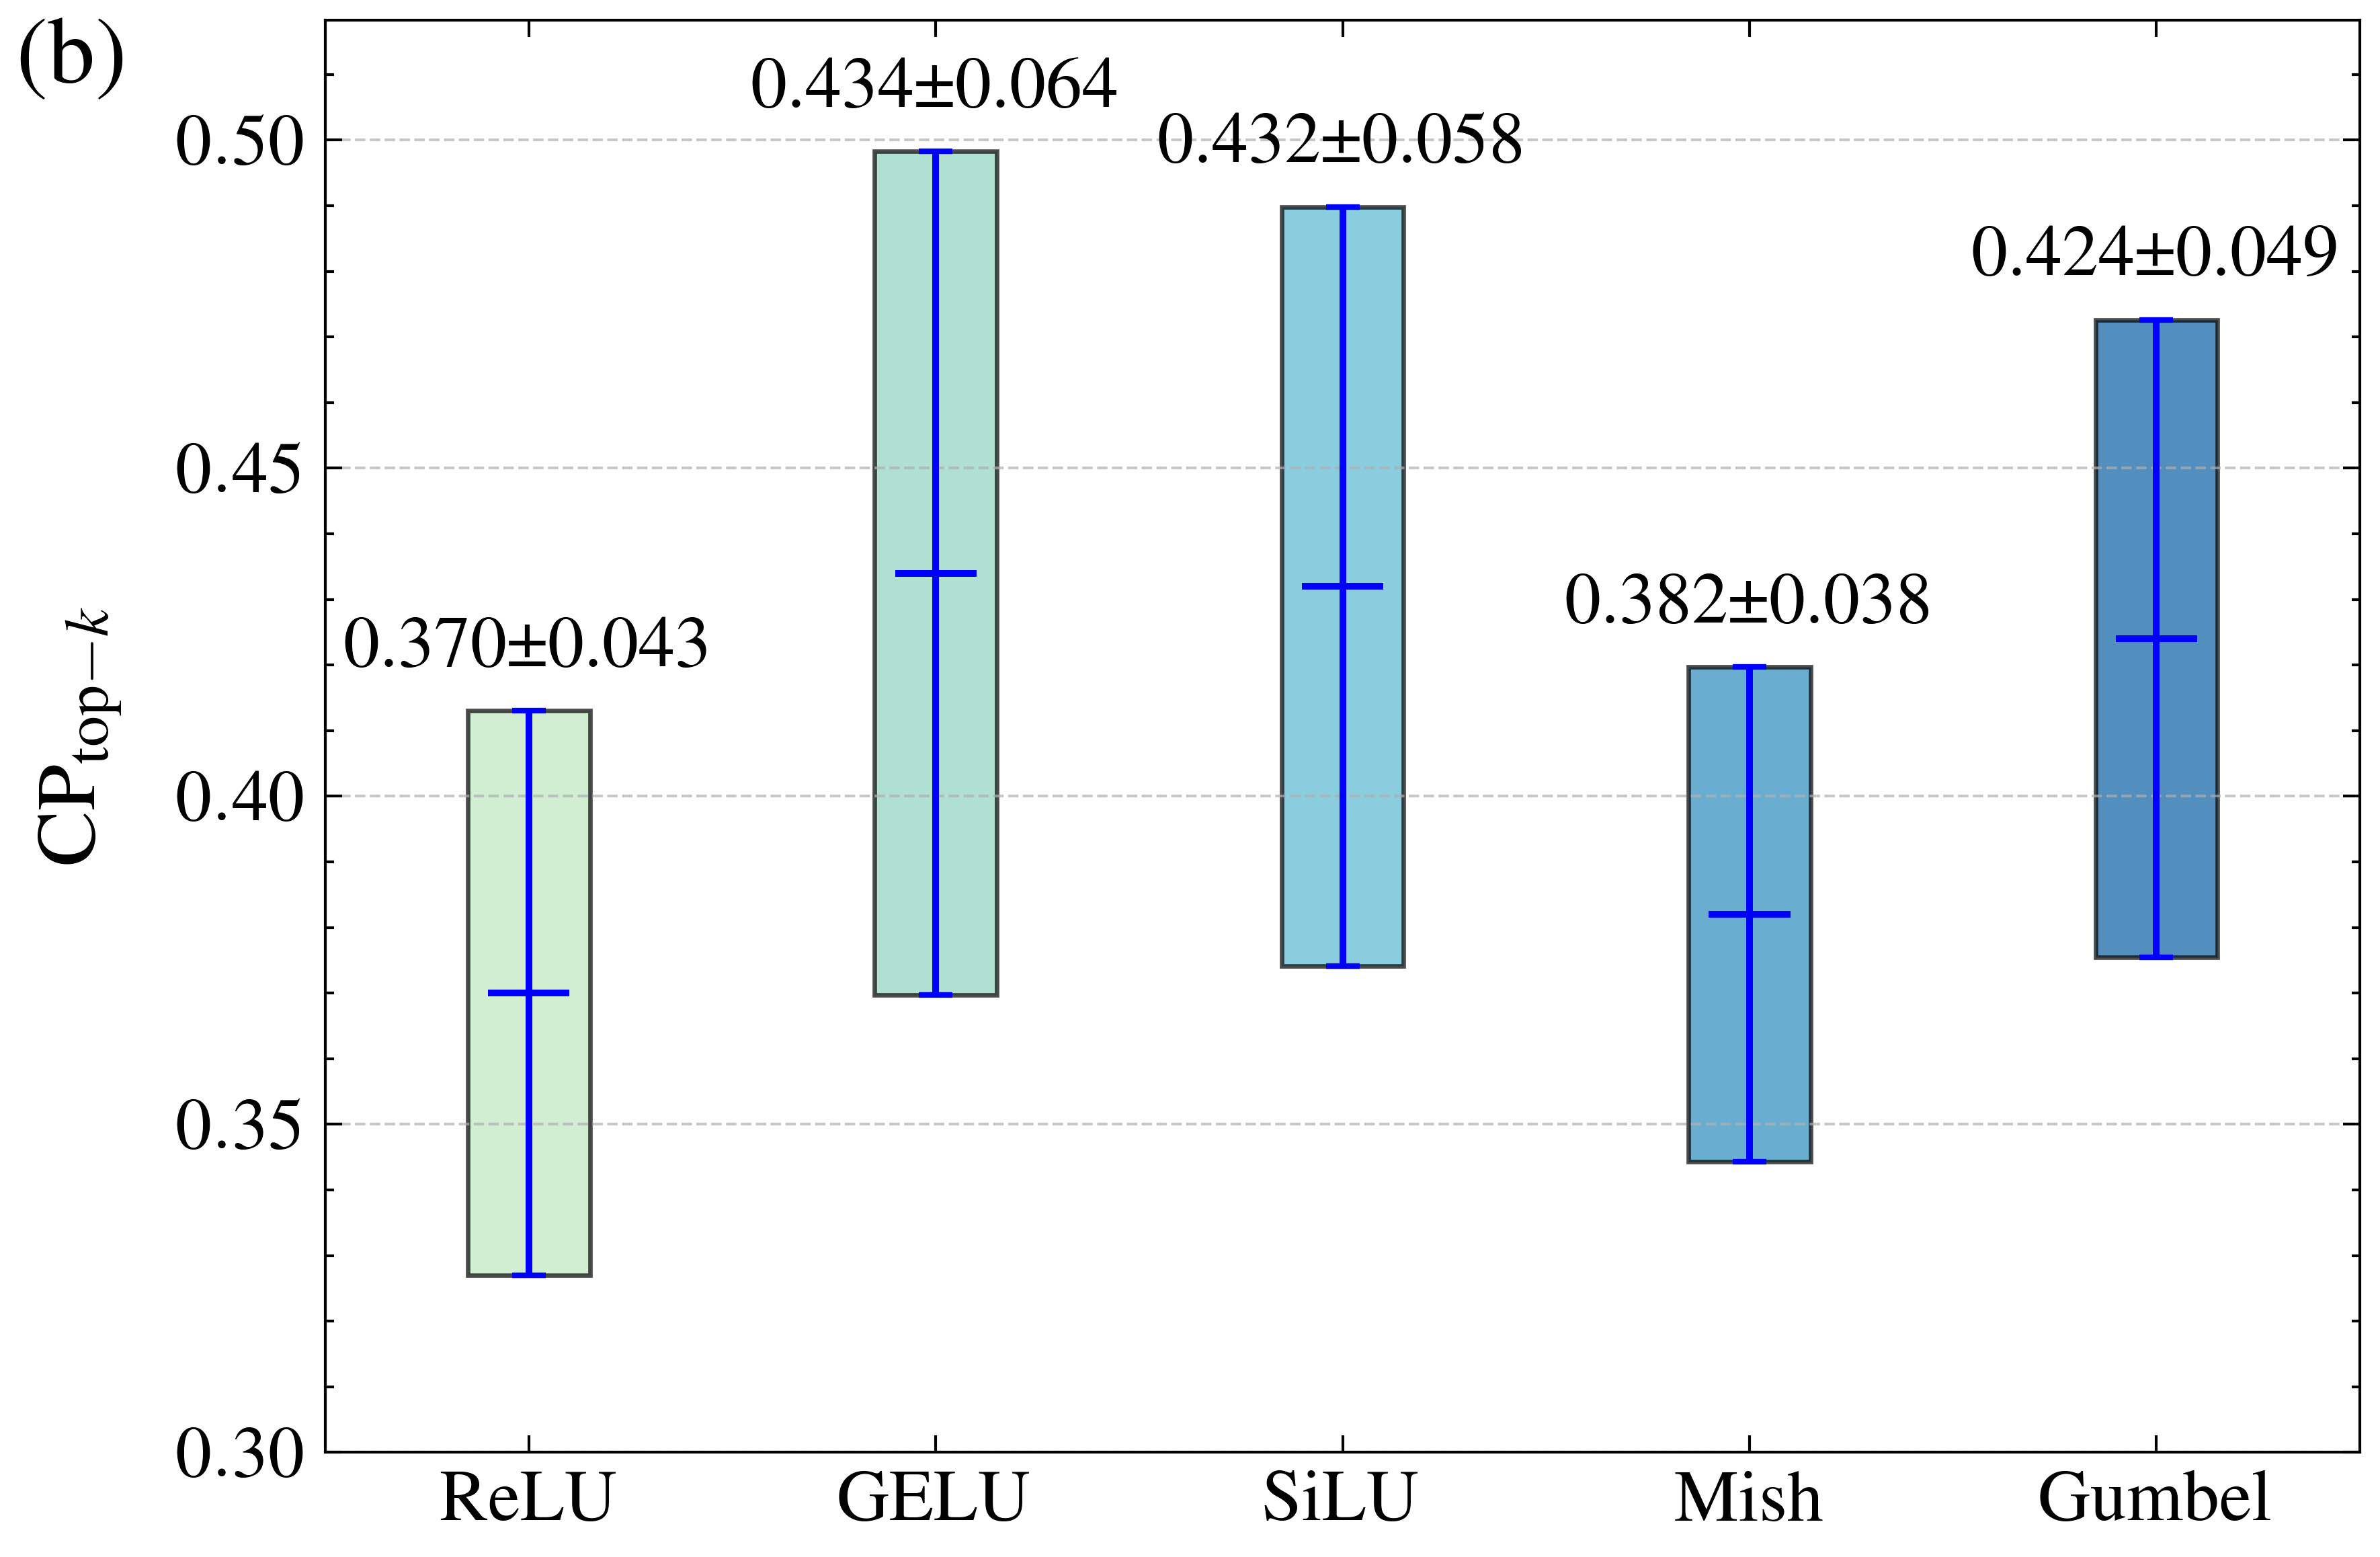

In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.31,0.39,0.37,0.39,0.39],
    [0.46,0.40,0.42,0.51,0.38],
    [0.42,0.40,0.38,0.47,0.49],
    [0.40,0.37,0.42,0.38,0.34],
    [0.42,0.43,0.46,0.36,0.45]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.GnBu(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.02
ax.set_ylim(0.3, y_max)
ax.set_yticks([0.30, 0.35, 0.40, 0.45, 0.50])
# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig9b.eps', format='eps', dpi=800)

# 显示图像
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


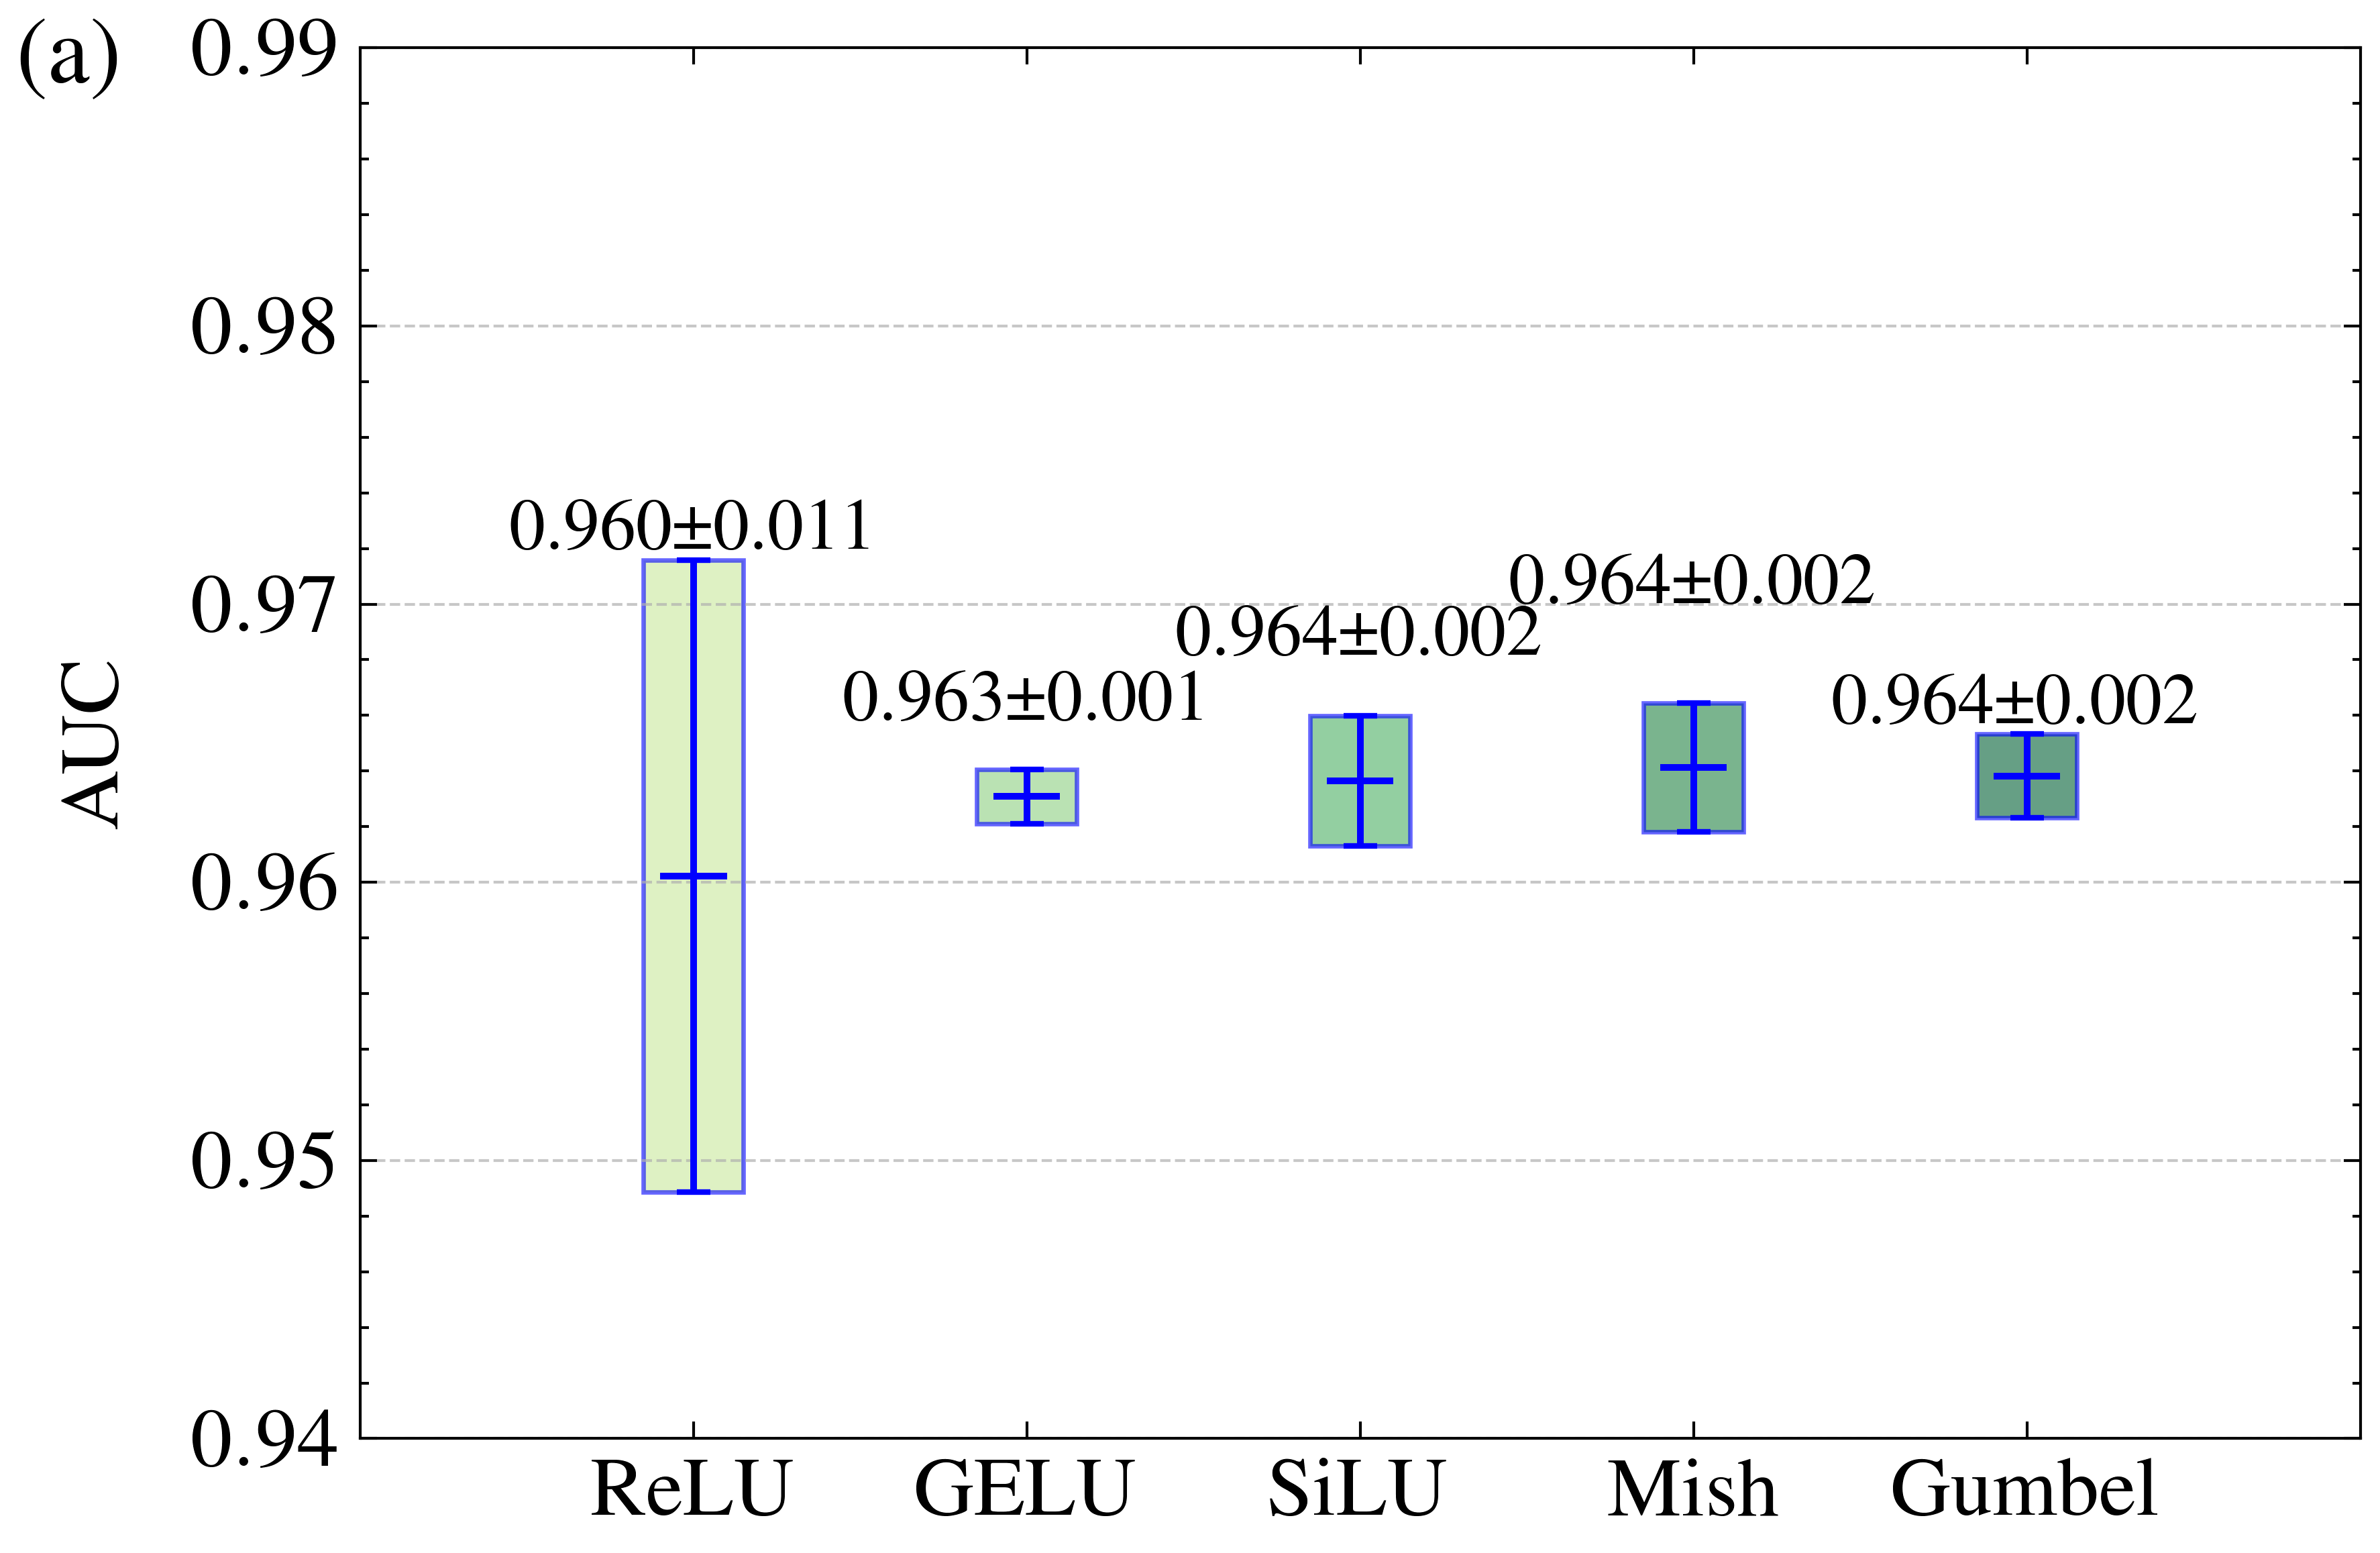

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数名称
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']

# 5 组数据（AUC 结果）
auc_data = np.array([
    [0.9527,0.9605,0.9635,0.9736,0.9508],  # ReLU
    [0.9625,0.9633,0.9642,0.9622,0.9632],  # GELU
    [0.9622,0.9642,0.9660,0.9613,0.9645],  # SiLU
    [0.9647,0.9623,0.9668,0.9624,0.9644],  # Mish
    [0.9634,0.9649,0.9619,0.9643,0.9646]   # Gumbel
])

# 计算均值和标准差
auc_means = np.mean(auc_data, axis=1)
auc_stds = np.std(auc_data, axis=1, ddof=1)  # 样本标准差

# 样本数
n = auc_data.shape[1]

# 计算 95% 置信区间
t_value = t.ppf(0.975, n - 1)  # t 分布临界值
auc_cis = t_value * (auc_stds / np.sqrt(n))

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 矩形和误差条的宽度
width = 0.3  

# 创建灰度颜色列表（从浅到深）
# gray_levels = np.linspace(0.5, 0.9, len(activation_functions))  # 颜色更浅
# colors = [plt.cm.gray(level) for level in gray_levels]
#colors = [plt.cm.inferno(i) for i in np.linspace(0.2, 0.9, len(activation_functions))]
colors = [plt.cm.YlGn(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  

# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算误差区间
    lower = auc_means[i] - auc_cis[i]
    upper = auc_means[i] + auc_cis[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, 
           color=colors[i], alpha=0.6, edgecolor='blue', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, 
              colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_cis[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5
    x_offset = 0
    if i == len(activation_functions) - 2: # Mish
        y_offset = 15
        x_offset = 0 # 调整 Mish 的水平偏移
    elif i == len(activation_functions) - 1: # Gumbel
        y_offset = -1 # 调整 Gumbel 的垂直偏移
        x_offset = -2 # 调整 Gumbel 的水平偏移
    if i == len(activation_functions) - 3: # Silu
        y_offset = 8
        x_offset = 0 
    if i == len(activation_functions) - 4: # GELU
        y_offset = 6
        x_offset = 0
    if i == len(activation_functions) - 5: # ReLU
        y_offset = -1
        x_offset = 0 

    ax.annotate(f'{auc_means[i]:.3f}±{auc_cis[i]:.3f}',
        xy=(x[i], upper),
        xytext=(x_offset, y_offset),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=13)
# 设置轴标签
ax.set_ylabel(r'AUC', fontsize=15, labelpad=10)

# 设置 x 轴刻度
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min(auc_means - auc_cis) - 0.005
y_max = max(auc_means + auc_cis) + 0.005
ax.set_ylim(0.94, 0.99)

# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  

# 添加 (b) 标记
ax.text(-0.17, 1.02, '(a)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig10a.eps', format='eps', dpi=800)

# 显示图形
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


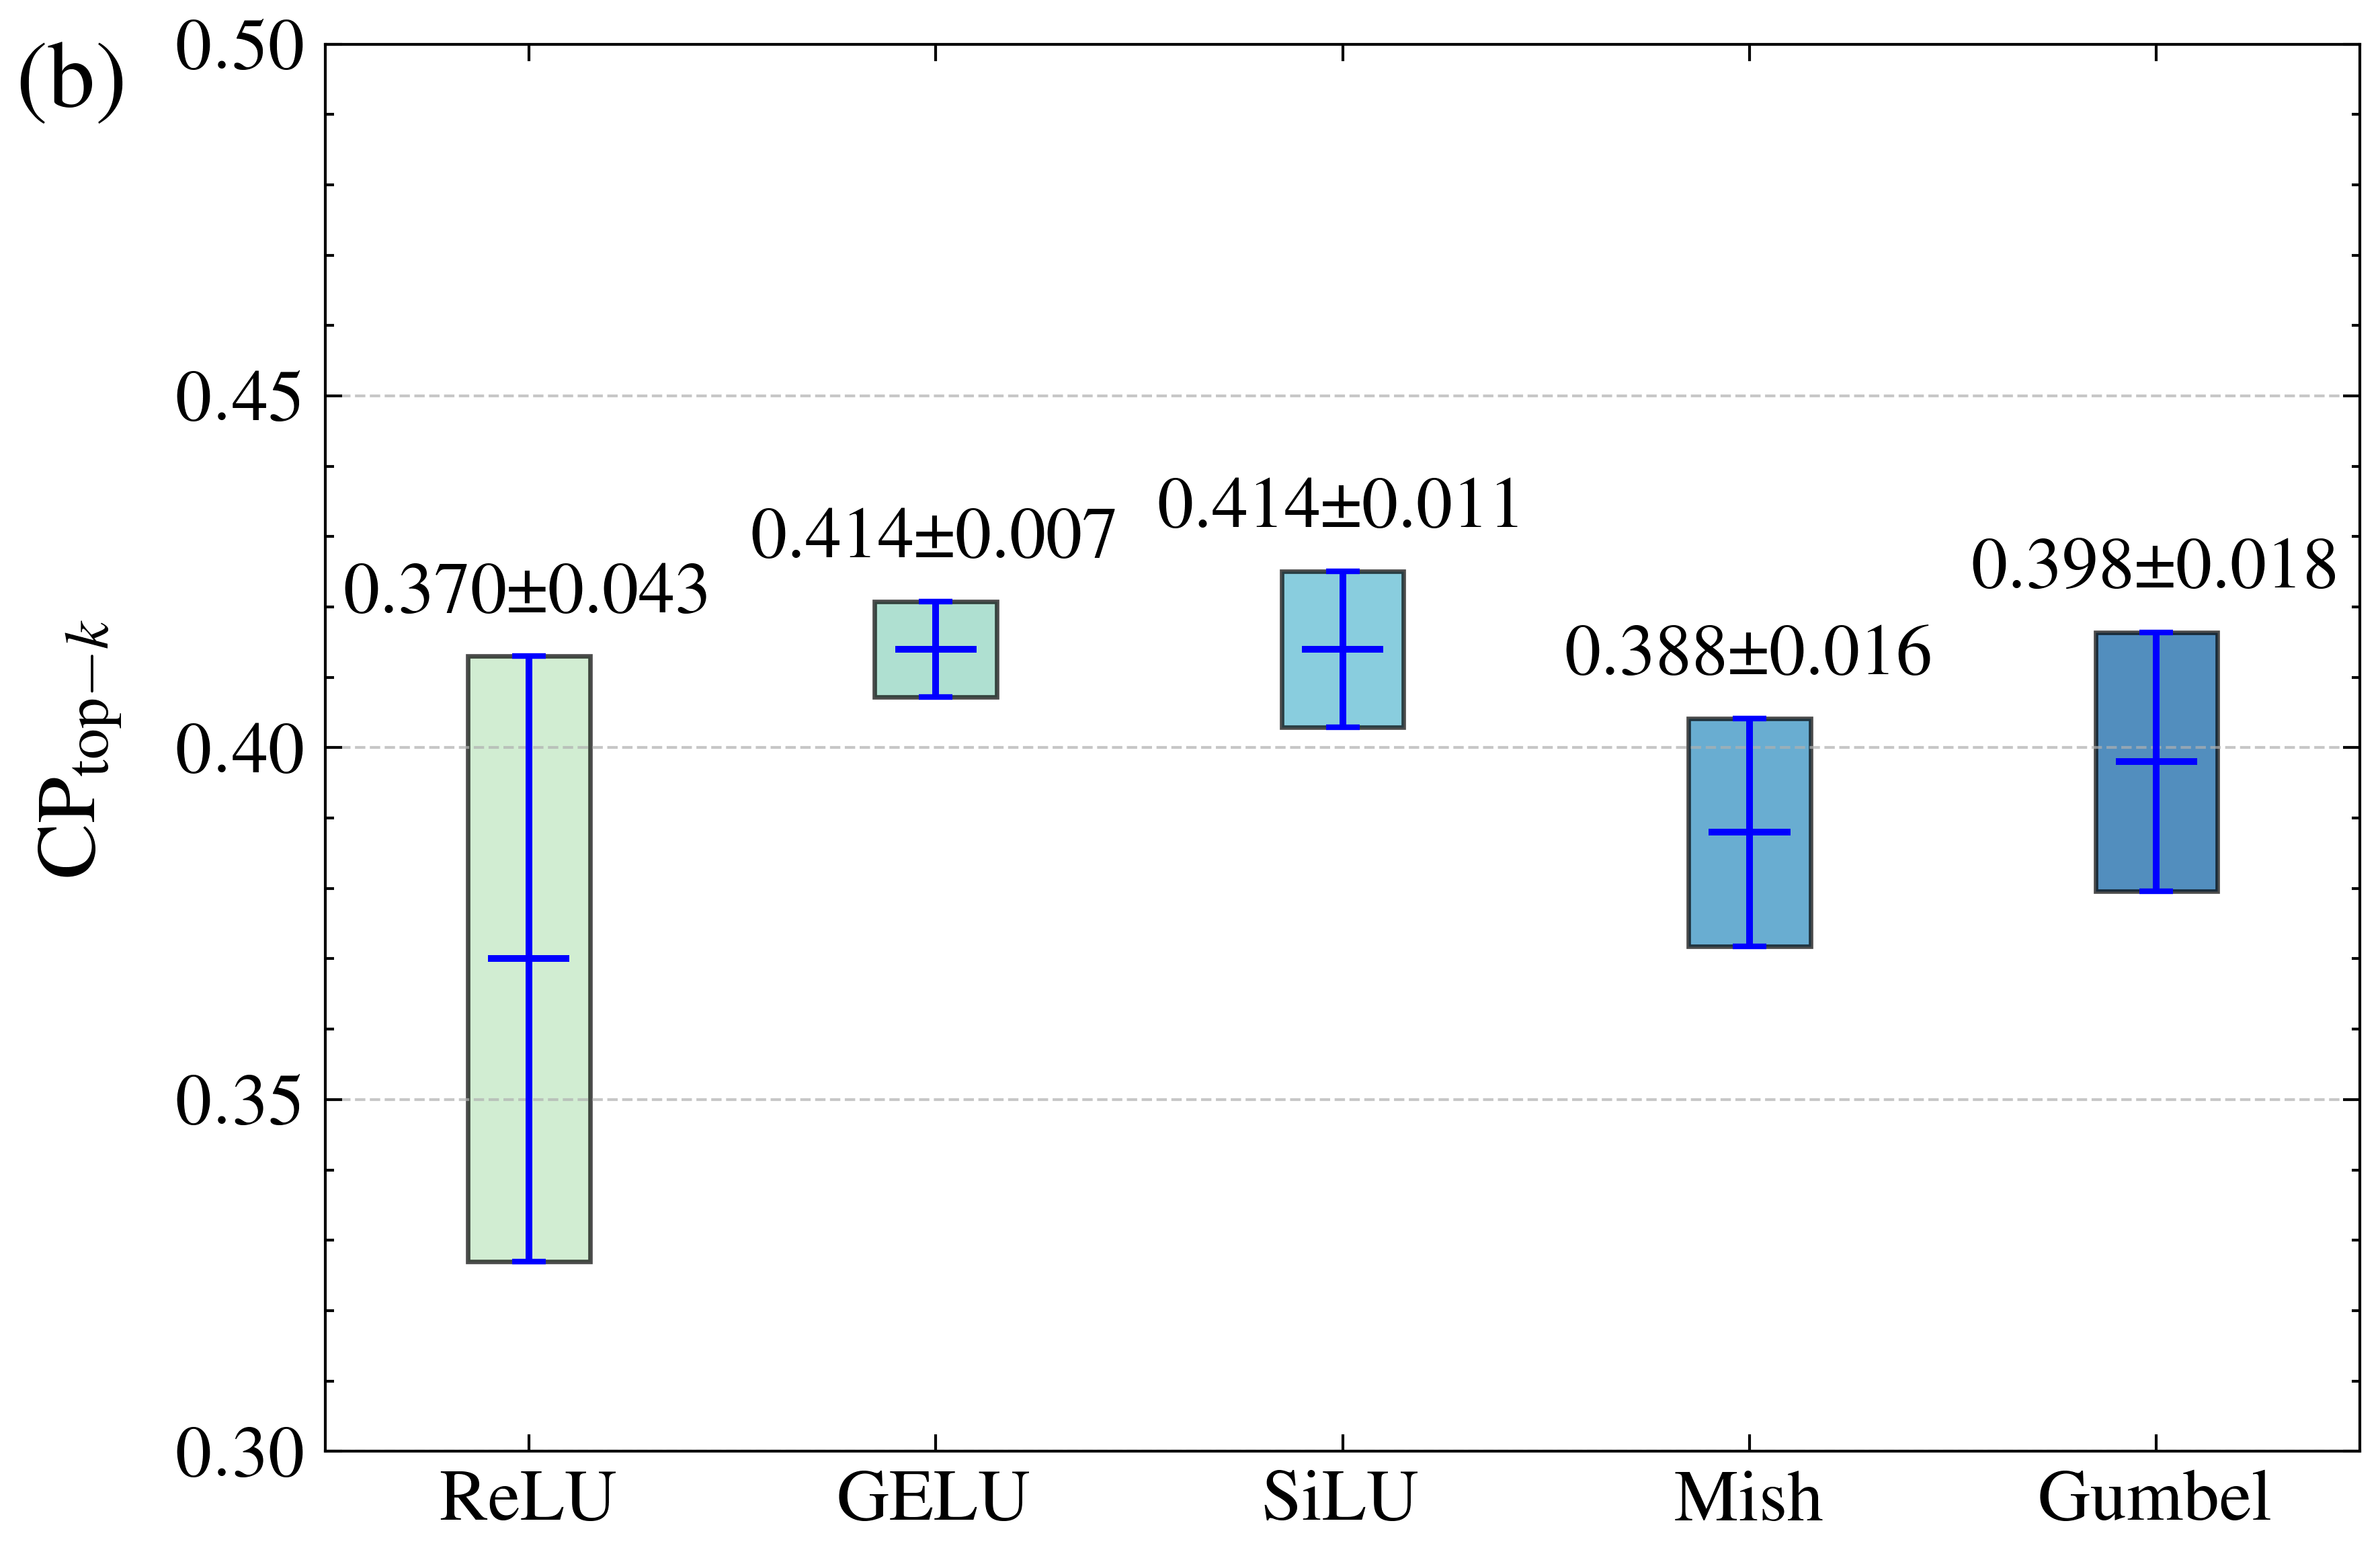

In [34]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots
from scipy.stats import t

# 禁用 LaTeX 渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 允许负号显示
plt.style.use(['science', 'ieee'])

# 激活函数及其 Top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
top_k_data = [
    [0.31,0.39,0.37,0.39,0.39],
    [0.41,0.41,0.41,0.42,0.42],
    [0.42,0.40,0.41,0.42,0.42],
    [0.39,0.37,0.40,0.38,0.40],
    [0.38,0.39,0.40,0.42,0.40]
]

# 计算均值、标准差、标准误（SE）、t 值、95% 置信区间
n_samples = len(top_k_data[0])
top_k_means = np.mean(top_k_data, axis=1)
top_k_stds = np.std(top_k_data, axis=1, ddof=1)  # 使用 ddof=1 计算样本标准差
top_k_se = top_k_stds / np.sqrt(n_samples)  # 计算标准误
t_value = t.ppf(0.975, df=n_samples - 1)  # 95% 置信区间的 t 值
top_k_ci = t_value * top_k_se  # 计算 95% 置信区间

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 控制柱子的宽度

# 创建颜色列表，使用 Viridis 颜色映射
colors = [plt.cm.GnBu(i) for i in np.linspace(0.3, 0.9, len(activation_functions))]

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0)  # 让网格线在最底层

# 绘制误差范围矩形、均值线和误差条（置信区间）
for i in range(len(activation_functions)):
    # 计算上下限
    lower = top_k_means[i] - top_k_ci[i]
    upper = top_k_means[i] + top_k_ci[i]

    # 绘制置信区间范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(top_k_means[i], x[i] - width / 3, x[i] + width / 3, colors='blue', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], top_k_means[i], yerr=top_k_ci[i], fmt='none',
                color='blue', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    ax.annotate(f'{top_k_means[i]:.3f}±{top_k_ci[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),  # 上移一点
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13)

# 设置 y 轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围
y_min = min(top_k_means - top_k_ci) - 0.005
y_max = max(top_k_means + top_k_ci) + 0.02
ax.set_ylim(0.3, y_max)
ax.set_yticks([0.30, 0.35, 0.40, 0.45, 0.50])
# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 0.5, x[-1] + 0.5)

# 添加图标标记，例如 (c)
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('D:/Credit Card Fraud Detection/Fig10b.eps', format='eps', dpi=800)

# 显示图像
plt.show()